<a href="https://colab.research.google.com/github/RC11-SkillsClass2022-23/RuijiaXiong/blob/main/ForLoopImagePredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import PIL
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dropout, Dense, Softmax)
from tensorflow.keras.applications import mobilenet as _mobilenet
import random
import os
import numpy as np

In [2]:
def load_image(img_file, target_size=(224,224)):
    X = np.zeros((1, *target_size, 3))
    X[0, ] = np.asarray(tf.keras.preprocessing.image.load_img(
        img_file, 
        target_size=target_size)
    )
    X = tf.keras.applications.mobilenet.preprocess_input(X)
    return X

def ensure_folder_exists(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)

In [3]:
model = tf.keras.applications.mobilenet.MobileNet()

17225924/17225924 [==============================] - 0s 0us/step


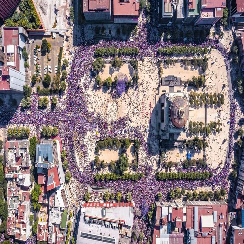

In [4]:
pseudo_image_id = os.listdir('/content/drive/MyDrive/RC11SkillClass2022/images2/pseudo')[0]
pseudo_path = os.path.join('/content/drive/MyDrive/RC11SkillClass2022/images2/pseudo', pseudo_image_id)
pseudo_image = load_image(pseudo_path)

tf.keras.preprocessing.image.load_img(pseudo_path, target_size=(244,244))

In [5]:
model = tf.keras.applications.mobilenet.MobileNet(
# The 3 is the three dimensions of the input: r,g,b.
  input_shape=(224, 224, 3), 
  include_top=False, 
  pooling='avg'
)

17225924/17225924 [==============================] - 0s 0us/step


In [7]:
model.predict(pseudo_image)

1/1 [==============================] - 1s 934ms/step


array([[1.9439480e-01, 1.7010179e+00, 6.6375196e-02, ..., 4.0162926e+00,
        1.1575466e-01, 3.0634645e-03]], dtype=float32)

In [8]:
x = Dropout(rate=0.4)(model.output)
x = Dense(2)(x)
x = Softmax()(x)
model = Model(model.inputs, x)

In [9]:
for layer in model.layers[:-3]:
  layer.trainable = False

In [10]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy'
)

In [11]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=_mobilenet.preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

ensure_folder_exists('training_aug')
training = datagen.flow_from_directory( 
    '/content/drive/MyDrive/RC11SkillClass2022/images2', 
    target_size=(224, 224),
    save_to_dir='./training_aug',
    subset='training'
) 

ensure_folder_exists('validation_aug')
validation = datagen.flow_from_directory( 
    '/content/drive/MyDrive/RC11SkillClass2022/images2',
    target_size=(224, 224),
    save_to_dir='./validation_aug',
    subset='validation'
) 

Found 283 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [12]:
batch_size = 32

history = model.fit(
    x=training,
    steps_per_epoch=training.samples // batch_size,
    # this needs to be much higher than 1, but for demo here we'll keep it at this
    epochs=1,
    validation_data=validation,
    validation_steps=validation.samples // batch_size
)

2/8 [======>.......................] - ETA: 30s - loss: 1.1667

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


8/8 [==============================] - 49s 6s/step - loss: 0.9512


In [13]:
random_pseudo = random.choice(os.listdir('/content/drive/MyDrive/RC11SkillClass2022/images2/pseudo'))
pseudo_path = os.path.join('/content/drive/MyDrive/RC11SkillClass2022/images2/pseudo',random_pseudo)
pseudo = load_image(pseudo_path)
random_public = random.choice(os.listdir('/content/drive/MyDrive/RC11SkillClass2022/images2/public'))
public_path = os.path.join('/content/drive/MyDrive/RC11SkillClass2022/images2/public',random_public)
public = load_image(public_path)

In [18]:
def preprocess_image(image_path):
    image = load_img(image_path, target_size=(224, 224))
    image = tf.keras.preprocessing.image.img_to_array(image)
    image = tf.keras.applications.mobilenet.preprocess_input(image)
    return image

In [21]:
from tensorflow.keras.preprocessing.image import load_img

In [28]:
import os
import numpy as np
from PIL import Image

# Define the path to the image folder
folder_path = '/content/drive/MyDrive/RC11SkillClass2022/pic'

image_files = os.listdir(folder_path)

# Loop through each image and predict whether it's a cat or dog
for file_name in image_files:
    # Load the image
    img_path = os.path.join(folder_path, file_name)
    img = load_image(img_path)

    # Make a prediction
    prediction = model.predict(img)

    # Get the class with the highest probability
    if prediction[0][0] > prediction[0][1]:
        class_label = 'pesudo'
    else:
        class_label = 'public'

    # Print the prediction result
    print(f'{file_name}: {class_label} ({np.round(prediction, 2)})')

1/1 [==============================] - 0s 106ms/step
1.png: pesudo ([[0.78 0.22]])
1/1 [==============================] - 0s 78ms/step
2.png: pesudo ([[0.94 0.06]])
1/1 [==============================] - 0s 68ms/step
3.png: public ([[0.38 0.62]])
1/1 [==============================] - 0s 83ms/step
4.png: pesudo ([[0.9 0.1]])
1/1 [==============================] - 0s 63ms/step
5.png: pesudo ([[0.94 0.06]])
1/1 [==============================] - 0s 68ms/step
6.png: public ([[0.3 0.7]])
1/1 [==============================] - 0s 66ms/step
7.png: pesudo ([[0.75 0.25]])
1/1 [==============================] - 0s 66ms/step
8.png: pesudo ([[0.56 0.44]])
1/1 [==============================] - 0s 66ms/step
9.png: pesudo ([[0.77 0.23]])
1/1 [==============================] - 0s 78ms/step
10.png: pesudo ([[0.93 0.07]])
1/1 [==============================] - 0s 67ms/step
11.png: pesudo ([[0.63 0.37]])
1/1 [==============================] - 0s 65ms/step
12.png: pesudo ([[0.91 0.09]])
1/1 [===========